This is a binary classification machine learning project to determine if a person will
survive or not in the titanic disaster given all the information of the person like age,
gender, socio-economic status etc

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

## Data Preprocessing and Cleaning

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Description:
survival ->	Survival	0 = No, 1 = Yes

pclass ->	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sex ->	Sex

Age ->	Age in years

sibsp	-> of siblings / spouses aboard the Titanic

parch	-> of parents / children aboard the Titanic

ticket ->	Ticket number

fare ->	Passenger fare

cabin ->	Cabin number

embarked ->	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
survived_counts = train_data['Survived'].value_counts()
print(f"Survivers: {survived_counts[1]}\n Non-survivers: {survived_counts[0]}")

Survivers: 342
 Non-survivers: 549


In [6]:
test_data = pd.read_csv('test.csv')
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test_data.shape

(418, 11)

In [8]:
# Dropping columns that are not useful for predictin
# Cabin column is reoved as it has mostly missing data
train_data = train_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
train_data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


## Data Visualization

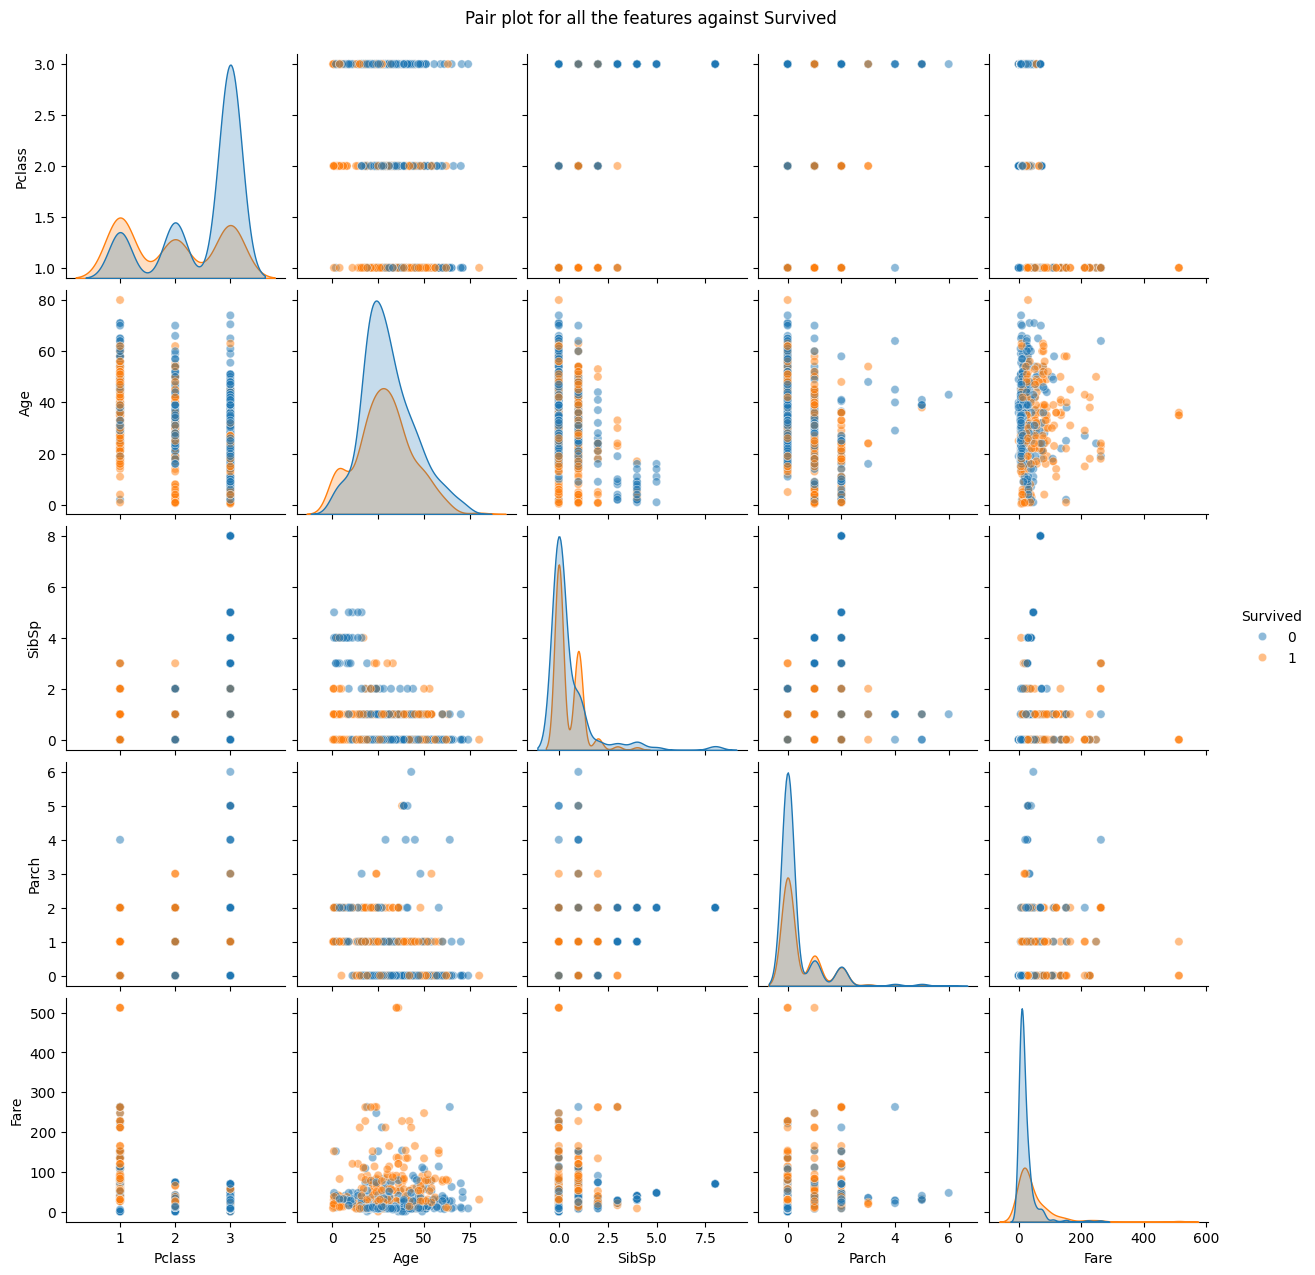

In [9]:
selected_features = ['Survived',	'Pclass',	'Sex',	'Age',	'SibSp',	'Parch',	'Fare']
sns.pairplot(train_data[selected_features], diag_kind = 'kde', hue = 'Survived', plot_kws = {'alpha':0.5})
plt.suptitle('Pair plot for all the features against Survived', y=1.02)
plt.show()

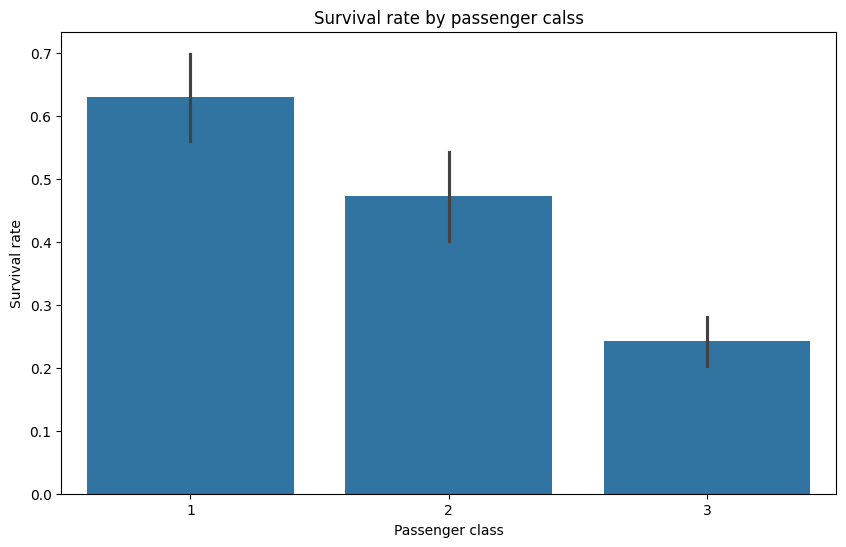

In [10]:
# Bar plot shows survival rate across different passenger class
# pclass: A proxy for socio-economic status (SES)
# 1st = Upper
# 2nd = Middle
# 3rd = Lower
plt.figure(figsize=(10,6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival rate by passenger calss')
plt.xlabel('Passenger class')
plt.ylabel('Survival rate')
plt.show()

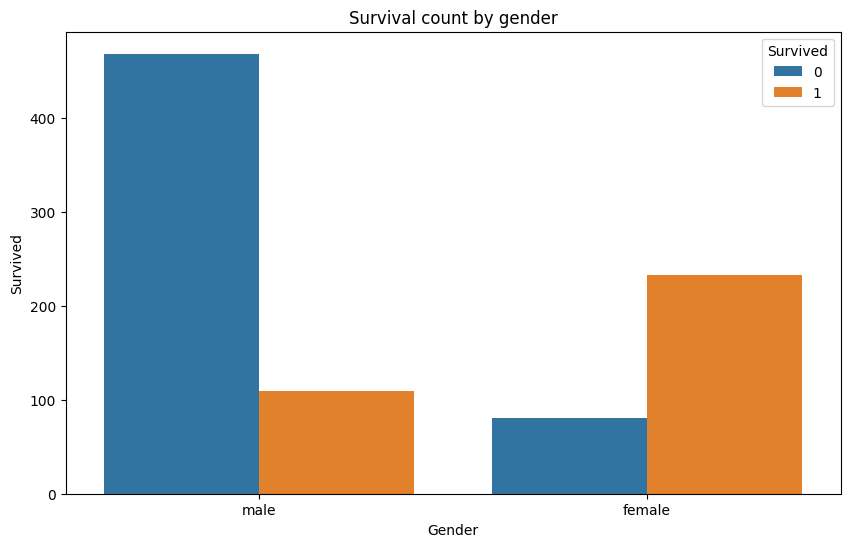

In [11]:
# Count plot for survivers and non-servivers according to gender
plt.figure(figsize=(10,6))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival count by gender')
plt.xlabel('Gender')
plt.ylabel('Survived')
plt.show()

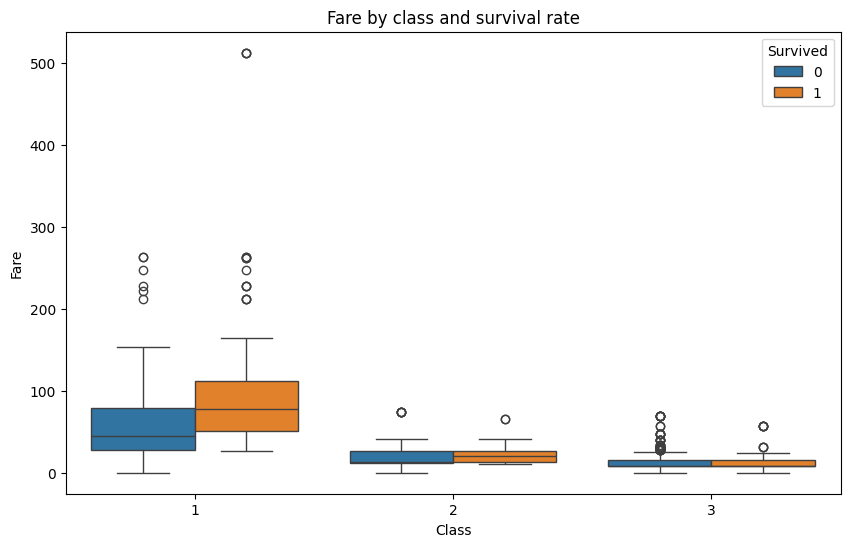

In [12]:
# Box plot of Fare by class and survival
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=train_data)
plt.title('Fare by class and survival rate')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

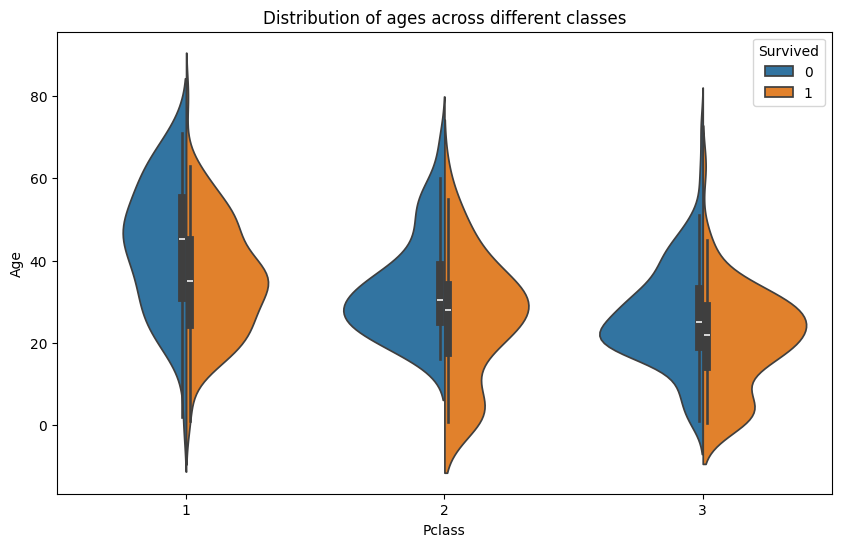

In [13]:
# Violen plot to get distribution of ages across different classes
plt.figure(figsize=(10,6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_data, split=True)
plt.title('Distribution of ages across different classes')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

The survival rates vary significantly by age and class.

First-class passengers generally had better survival rates across all ages.

Younger passengers had higher survival rates, especially in third class, indicating possible prioritization during rescue efforts.

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [15]:
train_data['Fare'].isnull().sum()

0

In [16]:
# Using mean to replace null values in Age column
mean_value = train_data['Age'].mean()
train_data['Age'] = train_data['Age'].fillna(mean_value)
train_data['Age'].isnull().sum()

0

In [17]:
# getting dummy variables from catagorical variables
sex_dummies = pd.get_dummies(train_data['Sex'], prefix='Sex')

# embarked_dummies = pd.get_dummies(train_data['Embarked'], prefix='Embarked')

train_data = pd.concat([train_data, sex_dummies], axis=1)

train_data.drop(['Sex'], axis=1, inplace=True)

train_data.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,False,True
1,1,1,38.0,1,0,71.2833,True,False
2,1,3,26.0,0,0,7.9250,True,False


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    bool   
 7   Sex_male    891 non-null    bool   
dtypes: bool(2), float64(2), int64(4)
memory usage: 43.6 KB


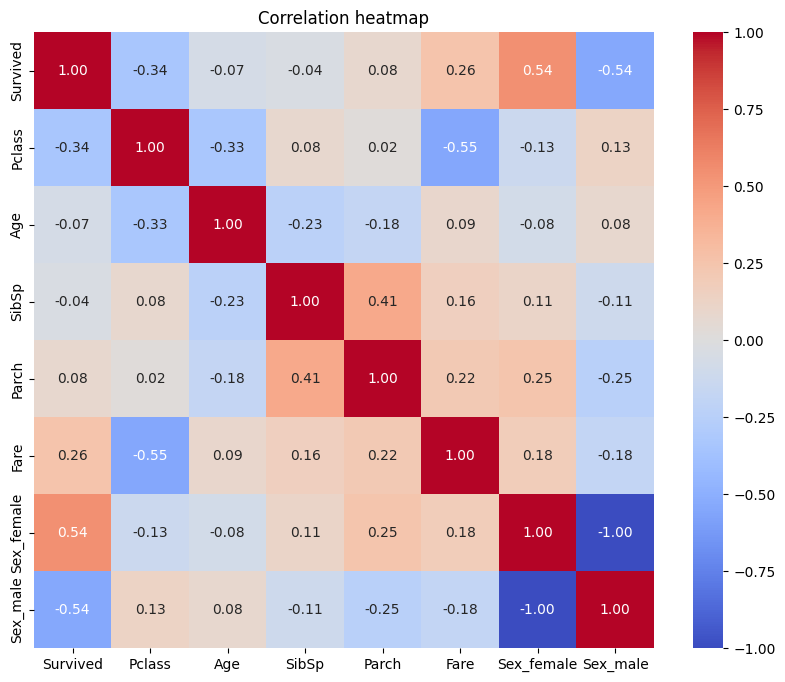

In [19]:
# Heatmap to figureout correlation
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

### Seperating features and ground truth

In [20]:
X = train_data.drop('Survived', axis=1)
y = train_data.Survived

X.head(), y.head()

(   Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male
 0       3  22.0      1      0   7.2500       False      True
 1       1  38.0      1      0  71.2833        True     False
 2       3  26.0      0      0   7.9250        True     False
 3       1  35.0      1      0  53.1000        True     False
 4       3  35.0      0      0   8.0500       False      True,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

### Split data to train and validation set

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, stratify=y, random_state=50)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((801, 7), (801,), (90, 7), (90,))

In [22]:
# Normalizing the features using standard scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_val_scaled = scaler.transform(X_val)

X_train_scaled[10], X_val_scaled[10]

(array([ 0.81436659, -1.4296136 , -0.47575137, -0.4775925 , -0.2747601 ,
        -0.73712455,  0.73712455]),
 array([ 0.81436659,  0.31605983, -0.47575137, -0.4775925 , -0.51287586,
        -0.73712455,  0.73712455]))

In [23]:
# Function for model evaluation
def evaluate_model(y_true, y_pred):
  """
  Evaluates and prints various metrices for a binary classification

  Parameters:
  - y_true: Ground truth
  - y_pred: Model predictions
  - y_pred_proba: Probability estimates of the positive classes as returned by
  a classifier

  Prints:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - Confusion Matrix
  """
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  cm = confusion_matrix(y_true, y_pred)

  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1 Score: {f1:.4f}")
  print("Confusion Matrix:")
  print(cm)

## MODEL TRAINING AND COMPARISON

In [24]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(X_train_scaled, y_train)
y_pred = model_LR.predict(X_val_scaled)

evaluate_model(y_val, y_pred)

Accuracy: 0.8444
Precision: 0.8387
Recall: 0.7429
F1 Score: 0.7879
Confusion Matrix:
[[50  5]
 [ 9 26]]


In [25]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train_scaled, y_train)
y_pred = model_RFC.predict(X_val_scaled)

evaluate_model(y_val, y_pred)

Accuracy: 0.9111
Precision: 0.9091
Recall: 0.8571
F1 Score: 0.8824
Confusion Matrix:
[[52  3]
 [ 5 30]]


In [26]:
# Random Forest Classifier is the best performing model
# So performing hyperparameter tuning using GridSearchCv

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [50, 80, 100, 150],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 5, 10, 15],
    'bootstrap': [True, False]
}

model_RFC_v2 = RandomForestClassifier()

grid_search = GridSearchCV(estimator=model_RFC_v2,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1, verbose=2,
                           scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_val_scaled)

evaluate_model(y_val, y_pred)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits
Best Parameters:  {'bootstrap': True, 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80}
Accuracy: 0.9000
Precision: 0.9333
Recall: 0.8000
F1 Score: 0.8615
Confusion Matrix:
[[53  2]
 [ 7 28]]


In [27]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model_GBC = GradientBoostingClassifier()
model_GBC.fit(X_train_scaled, y_train)
y_pred = model_GBC.predict(X_val_scaled)

evaluate_model(y_val, y_pred)

Accuracy: 0.8444
Precision: 0.8387
Recall: 0.7429
F1 Score: 0.7879
Confusion Matrix:
[[50  5]
 [ 9 26]]


In [28]:
# Support Vector Classifier
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train_scaled, y_train)
y_pred = model_svc.predict(X_val_scaled)

evaluate_model(y_val, y_pred)

Accuracy: 0.8889
Precision: 0.9310
Recall: 0.7714
F1 Score: 0.8438
Confusion Matrix:
[[53  2]
 [ 8 27]]


In [29]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train_scaled, y_train)
y_pred = model_KNN.predict(X_val_scaled)

evaluate_model(y_val, y_pred)

Accuracy: 0.8667
Precision: 0.8485
Recall: 0.8000
F1 Score: 0.8235
Confusion Matrix:
[[50  5]
 [ 7 28]]


In [30]:
# Neural Networks
from sklearn.neural_network import MLPClassifier
model_NN = MLPClassifier()
model_NN.fit(X_train_scaled, y_train)
y_pred = model_NN.predict(X_val_scaled)

evaluate_model(y_val, y_pred)

Accuracy: 0.8778
Precision: 0.8529
Recall: 0.8286
F1 Score: 0.8406
Confusion Matrix:
[[50  5]
 [ 6 29]]


In [31]:
# Experiment to perform hyperparameter tuning for the Neural Networks model
param_grid = {
    'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}

model_NN_v2 = MLPClassifier(max_iter=100)

grid_search = GridSearchCV(estimator=model_NN_v2,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=1,
                           scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Parameters: ", best_params)

best_nn = grid_search.best_estimator_

y_pred = best_nn.predict(X_val_scaled)

evaluate_model(y_val, y_pred)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters:  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'solver': 'adam'}
Accuracy: 0.8444
Precision: 0.8621
Recall: 0.7143
F1 Score: 0.7813
Confusion Matrix:
[[51  4]
 [10 25]]


## Running inference on test data with best model (Tuned Random Forest Classifier)

Preprocessing test data

In [32]:
test_data = pd.read_csv('test.csv')
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
# Dropping model unrelated columns
test_data = test_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
test_data.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000


In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [35]:
# Replacing nan values in age colum to zeor
test_data['Age'] = test_data['Age'].fillna(0)

test_data['Fare'] = test_data['Fare'].fillna(0)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


In [36]:
# changing catagorical data to numerical
sex_dummies = pd.get_dummies(test_data['Sex'], prefix='Sex')

test_data = pd.concat([test_data, sex_dummies], axis=1)

test_data.drop(['Sex'], axis=1, inplace=True)

test_data.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,False,True
1,3,47.0,1,0,7.0000,True,False
2,2,62.0,0,0,9.6875,False,True


In [37]:
# Standardising data
# scaler = StandardScaler()

test_data_scaled = scaler.transform(test_data)

test_data_scaled[10]

array([ 0.81436659, -2.2645009 , -0.47575137, -0.4775925 , -0.48575495,
       -0.73712455,  0.73712455])

In [38]:
# Running inference
y_pred = best_rf.predict(test_data_scaled)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [39]:
test_data_original = pd.read_csv('test.csv')

passenger_survival_df = pd.DataFrame({
    'PassengerID': test_data_original['PassengerId'],
    'Survived': y_pred
})

passenger_survival_df.head(10)

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [42]:
# Exporting the dataframe to a csv file
passenger_survival_df.to_csv('passenger_survival.csv', index=False)

In [45]:
passenger_survival_df.shape

(418, 2)

In [44]:
# Reference to how the final submission format should be for the Keggle competition
submission = pd.read_csv('gender_submission.csv')
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


# passenger_survuval.csv is the final file to be submitted to kaggle compitation